In [1]:
# Dependencies
import numpy as np
import pandas as pd
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [4]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date)==6).all()

[('2010-06-01', 78.0),
 ('2010-06-02', 76.0),
 ('2010-06-03', 78.0),
 ('2010-06-04', 76.0),
 ('2010-06-05', 77.0),
 ('2010-06-06', 78.0),
 ('2010-06-07', 77.0),
 ('2010-06-08', 78.0),
 ('2010-06-09', 78.0),
 ('2010-06-10', 79.0),
 ('2010-06-11', 78.0),
 ('2010-06-12', 78.0),
 ('2010-06-13', 78.0),
 ('2010-06-14', 77.0),
 ('2010-06-15', 78.0),
 ('2010-06-16', 78.0),
 ('2010-06-17', 77.0),
 ('2010-06-18', 77.0),
 ('2010-06-19', 82.0),
 ('2010-06-20', 78.0),
 ('2010-06-21', 78.0),
 ('2010-06-22', 78.0),
 ('2010-06-23', 78.0),
 ('2010-06-24', 78.0),
 ('2010-06-25', 77.0),
 ('2010-06-26', 76.0),
 ('2010-06-27', 78.0),
 ('2010-06-28', 78.0),
 ('2010-06-29', 78.0),
 ('2010-06-30', 78.0),
 ('2011-06-01', 77.0),
 ('2011-06-02', 78.0),
 ('2011-06-03', 73.0),
 ('2011-06-04', 70.0),
 ('2011-06-05', 76.0),
 ('2011-06-06', 77.0),
 ('2011-06-07', 77.0),
 ('2011-06-08', 77.0),
 ('2011-06-09', 77.0),
 ('2011-06-10', 78.0),
 ('2011-06-11', 77.0),
 ('2011-06-12', 77.0),
 ('2011-06-13', 78.0),
 ('2011-06-

In [5]:
#  3. Convert the June temperatures to a list.
results = []
results = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date)==6).all()
results

[('2010-06-01', 78.0),
 ('2010-06-02', 76.0),
 ('2010-06-03', 78.0),
 ('2010-06-04', 76.0),
 ('2010-06-05', 77.0),
 ('2010-06-06', 78.0),
 ('2010-06-07', 77.0),
 ('2010-06-08', 78.0),
 ('2010-06-09', 78.0),
 ('2010-06-10', 79.0),
 ('2010-06-11', 78.0),
 ('2010-06-12', 78.0),
 ('2010-06-13', 78.0),
 ('2010-06-14', 77.0),
 ('2010-06-15', 78.0),
 ('2010-06-16', 78.0),
 ('2010-06-17', 77.0),
 ('2010-06-18', 77.0),
 ('2010-06-19', 82.0),
 ('2010-06-20', 78.0),
 ('2010-06-21', 78.0),
 ('2010-06-22', 78.0),
 ('2010-06-23', 78.0),
 ('2010-06-24', 78.0),
 ('2010-06-25', 77.0),
 ('2010-06-26', 76.0),
 ('2010-06-27', 78.0),
 ('2010-06-28', 78.0),
 ('2010-06-29', 78.0),
 ('2010-06-30', 78.0),
 ('2011-06-01', 77.0),
 ('2011-06-02', 78.0),
 ('2011-06-03', 73.0),
 ('2011-06-04', 70.0),
 ('2011-06-05', 76.0),
 ('2011-06-06', 77.0),
 ('2011-06-07', 77.0),
 ('2011-06-08', 77.0),
 ('2011-06-09', 77.0),
 ('2011-06-10', 78.0),
 ('2011-06-11', 77.0),
 ('2011-06-12', 77.0),
 ('2011-06-13', 78.0),
 ('2011-06-

In [6]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
df = pd.DataFrame(results, columns=['date','June Temps'])
df

,date,June Temps
0,2010-06-01,78.0
1,2010-06-02,76.0
2,2010-06-03,78.0
3,2010-06-04,76.0
4,2010-06-05,77.0
...,...,...
1695,2017-06-26,79.0
1696,2017-06-27,74.0
1697,2017-06-28,74.0
1698,2017-06-29,76.0


In [7]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [8]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date)==12).all()

[('2010-12-01', 76.0),
 ('2010-12-03', 74.0),
 ('2010-12-04', 74.0),
 ('2010-12-06', 64.0),
 ('2010-12-07', 64.0),
 ('2010-12-08', 67.0),
 ('2010-12-09', 77.0),
 ('2010-12-10', 66.0),
 ('2010-12-11', 69.0),
 ('2010-12-12', 68.0),
 ('2010-12-13', 68.0),
 ('2010-12-14', 71.0),
 ('2010-12-15', 74.0),
 ('2010-12-16', 67.0),
 ('2010-12-17', 66.0),
 ('2010-12-18', 69.0),
 ('2010-12-19', 71.0),
 ('2010-12-23', 70.0),
 ('2010-12-24', 70.0),
 ('2010-12-26', 74.0),
 ('2010-12-27', 74.0),
 ('2010-12-28', 71.0),
 ('2010-12-29', 75.0),
 ('2010-12-30', 75.0),
 ('2010-12-31', 72.0),
 ('2011-12-01', 69.0),
 ('2011-12-02', 68.0),
 ('2011-12-03', 73.0),
 ('2011-12-04', 74.0),
 ('2011-12-05', 73.0),
 ('2011-12-06', 73.0),
 ('2011-12-07', 73.0),
 ('2011-12-08', 73.0),
 ('2011-12-09', 71.0),
 ('2011-12-10', 73.0),
 ('2011-12-11', 73.0),
 ('2011-12-12', 77.0),
 ('2011-12-13', 72.0),
 ('2011-12-14', 71.0),
 ('2011-12-15', 73.0),
 ('2011-12-16', 70.0),
 ('2011-12-17', 73.0),
 ('2011-12-18', 69.0),
 ('2011-12-

In [9]:
# 7. Convert the December temperatures to a list.
results = []
results = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date)==12).all()
results

[('2010-12-01', 76.0),
 ('2010-12-03', 74.0),
 ('2010-12-04', 74.0),
 ('2010-12-06', 64.0),
 ('2010-12-07', 64.0),
 ('2010-12-08', 67.0),
 ('2010-12-09', 77.0),
 ('2010-12-10', 66.0),
 ('2010-12-11', 69.0),
 ('2010-12-12', 68.0),
 ('2010-12-13', 68.0),
 ('2010-12-14', 71.0),
 ('2010-12-15', 74.0),
 ('2010-12-16', 67.0),
 ('2010-12-17', 66.0),
 ('2010-12-18', 69.0),
 ('2010-12-19', 71.0),
 ('2010-12-23', 70.0),
 ('2010-12-24', 70.0),
 ('2010-12-26', 74.0),
 ('2010-12-27', 74.0),
 ('2010-12-28', 71.0),
 ('2010-12-29', 75.0),
 ('2010-12-30', 75.0),
 ('2010-12-31', 72.0),
 ('2011-12-01', 69.0),
 ('2011-12-02', 68.0),
 ('2011-12-03', 73.0),
 ('2011-12-04', 74.0),
 ('2011-12-05', 73.0),
 ('2011-12-06', 73.0),
 ('2011-12-07', 73.0),
 ('2011-12-08', 73.0),
 ('2011-12-09', 71.0),
 ('2011-12-10', 73.0),
 ('2011-12-11', 73.0),
 ('2011-12-12', 77.0),
 ('2011-12-13', 72.0),
 ('2011-12-14', 71.0),
 ('2011-12-15', 73.0),
 ('2011-12-16', 70.0),
 ('2011-12-17', 73.0),
 ('2011-12-18', 69.0),
 ('2011-12-

In [10]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
df = pd.DataFrame(results, columns=['date','December Temps'])
df

,date,December Temps
0,2010-12-01,76.0
1,2010-12-03,74.0
2,2010-12-04,74.0
3,2010-12-06,64.0
4,2010-12-07,64.0
...,...,...
1512,2016-12-27,71.0
1513,2016-12-28,71.0
1514,2016-12-29,69.0
1515,2016-12-30,65.0


In [11]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
df.describe()

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [12]:
# extra query - precip data for June and December for 2016 - 2017 december data not present
june_precip = []
june_precip = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= '2016-06-01').filter(Measurement.date <= '2016-06-30').all()
june_precip

[('2017-06-01', 0.0),
 ('2017-06-02', 0.0),
 ('2017-06-03', 0.02),
 ('2017-06-04', 0.0),
 ('2017-06-05', 0.0),
 ('2017-06-06', 0.0),
 ('2017-06-07', 0.0),
 ('2017-06-08', 0.0),
 ('2017-06-09', 0.0),
 ('2017-06-10', 0.04),
 ('2017-06-11', 0.08),
 ('2017-06-12', 0.02),
 ('2017-06-13', 0.0),
 ('2017-06-14', 0.0),
 ('2017-06-15', 0.0),
 ('2017-06-16', 0.0),
 ('2017-06-17', 0.0),
 ('2017-06-18', 0.05),
 ('2017-06-19', 0.0),
 ('2017-06-20', 0.02),
 ('2017-06-21', 0.0),
 ('2017-06-22', 0.0),
 ('2017-06-23', 0.0),
 ('2017-06-24', 0.06),
 ('2017-06-25', 0.0),
 ('2017-06-26', 0.0),
 ('2017-06-27', 0.0),
 ('2017-06-28', 0.0),
 ('2017-06-29', 0.0),
 ('2017-06-30', 0.08),
 ('2017-06-01', 0.03),
 ('2017-06-02', 0.1),
 ('2017-06-03', 0.2),
 ('2017-06-04', 0.15),
 ('2017-06-05', 0.0),
 ('2017-06-06', 0.0),
 ('2017-06-07', 0.0),
 ('2017-06-08', 0.02),
 ('2017-06-09', 0.02),
 ('2017-06-10', 0.21),
 ('2017-06-11', 0.24),
 ('2017-06-12', 0.19),
 ('2017-06-13', 0.36),
 ('2017-06-14', 0.27),
 ('2017-06-15',

In [13]:
june_precip = pd.DataFrame(june_precip, columns=['date','precipitation'])
june_precip

,date,precipitation
0,2017-06-01,0.00
1,2017-06-02,0.00
2,2017-06-03,0.02
3,2017-06-04,0.00
4,2017-06-05,0.00
...,...,...
186,2017-06-26,0.02
187,2017-06-27,0.10
188,2017-06-28,0.02
189,2017-06-29,0.04


In [14]:
june_precip = june_precip.groupby(["date"]).sum()["precipitation"]
june_precip

date
2017-06-01    0.04
2017-06-02    0.34
2017-06-03    0.61
2017-06-04    1.15
2017-06-05    0.08
2017-06-06    0.00
2017-06-07    0.01
2017-06-08    0.03
2017-06-09    0.04
2017-06-10    1.53
2017-06-11    2.15
2017-06-12    1.75
2017-06-13    1.38
2017-06-14    1.57
2017-06-15    2.71
2017-06-16    0.20
2017-06-17    0.54
2017-06-18    1.42
2017-06-19    0.73
2017-06-20    0.55
2017-06-21    0.51
2017-06-22    0.44
2017-06-23    0.67
2017-06-24    0.64
2017-06-25    0.60
2017-06-26    0.10
2017-06-27    0.11
2017-06-28    0.03
2017-06-29    0.07
2017-06-30    0.52
Name: precipitation, dtype: float64

In [15]:
june_precip = pd.DataFrame(june_precip, columns=['precipitation'])
june_precip

,precipitation
date,
2017-06-01,0.04
2017-06-02,0.34
2017-06-03,0.61
2017-06-04,1.15
2017-06-05,0.08
2017-06-06,0.00
2017-06-07,0.01
2017-06-08,0.03
2017-06-09,0.04


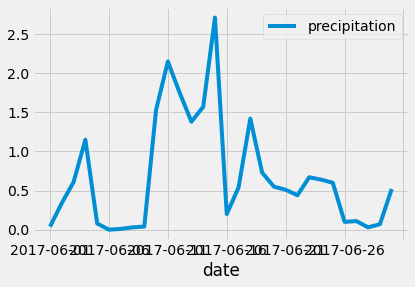

In [17]:
june_precip = june_precip.sort_index()
june_precip.plot()

In [21]:
june_precip.describe()

,precipitation
count,30.000000
mean,0.684000
std,0.711441
min,0.000000
25%,0.085000
50%,0.530000
75%,1.045000
max,2.710000


In [ ]:
dec_precip = []
dec_precip = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date)==12).all()
dec_precip

In [31]:
dec_precip = []
dec_precip = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= '2016-12-01').filter(Measurement.date <= '2016-12-30').all()
dec_precip

[('2016-12-01', 0.12),
 ('2016-12-02', 0.03),
 ('2016-12-03', 0.0),
 ('2016-12-04', 0.03),
 ('2016-12-05', 0.43),
 ('2016-12-06', 0.02),
 ('2016-12-07', 0.0),
 ('2016-12-08', 0.03),
 ('2016-12-09', 0.52),
 ('2016-12-10', 0.05),
 ('2016-12-11', 0.04),
 ('2016-12-12', 0.01),
 ('2016-12-13', 0.05),
 ('2016-12-14', 0.03),
 ('2016-12-15', 0.0),
 ('2016-12-16', 0.0),
 ('2016-12-17', 0.01),
 ('2016-12-18', 0.13),
 ('2016-12-19', 0.01),
 ('2016-12-20', 0.0),
 ('2016-12-21', 0.0),
 ('2016-12-22', 0.01),
 ('2016-12-23', 0.01),
 ('2016-12-24', 0.01),
 ('2016-12-25', 0.0),
 ('2016-12-26', 0.02),
 ('2016-12-27', 0.0),
 ('2016-12-28', 0.02),
 ('2016-12-29', 0.04),
 ('2016-12-30', 0.12),
 ('2016-12-01', 0.33),
 ('2016-12-02', 0.3),
 ('2016-12-03', 0.04),
 ('2016-12-04', 0.1),
 ('2016-12-05', 0.34),
 ('2016-12-06', 0.02),
 ('2016-12-07', 0.17),
 ('2016-12-08', 0.03),
 ('2016-12-09', 0.34),
 ('2016-12-10', 0.02),
 ('2016-12-11', 0.02),
 ('2016-12-12', 0.01),
 ('2016-12-13', 0.1),
 ('2016-12-14', 0.05),

In [32]:
dec_precip = pd.DataFrame(dec_precip, columns=['date','precipitation'])
dec_precip = dec_precip.groupby(["date"]).sum()["precipitation"]
dec_precip

date
2016-12-01    1.77
2016-12-02    2.36
2016-12-03    2.71
2016-12-04    0.80
2016-12-05    3.24
2016-12-06    0.04
2016-12-07    0.38
2016-12-08    0.46
2016-12-09    1.85
2016-12-10    0.13
2016-12-11    0.25
2016-12-12    0.05
2016-12-13    0.77
2016-12-14    1.50
2016-12-15    0.26
2016-12-16    0.04
2016-12-17    0.35
2016-12-18    0.89
2016-12-19    0.42
2016-12-20    0.03
2016-12-21    0.90
2016-12-22    2.47
2016-12-23    1.23
2016-12-24    1.62
2016-12-25    0.43
2016-12-26    2.04
2016-12-27    0.24
2016-12-28    0.41
2016-12-29    2.38
2016-12-30    3.35
Name: precipitation, dtype: float64

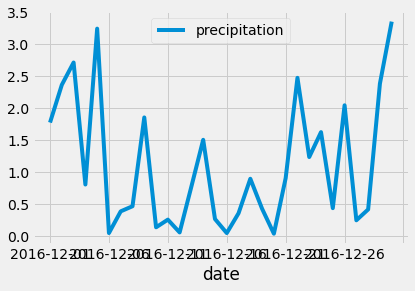

In [33]:
dec_precip = pd.DataFrame(dec_precip, columns=['precipitation'])
dec_precip.plot()

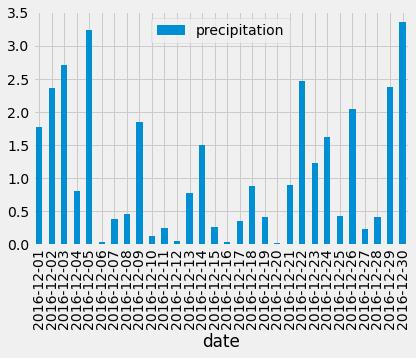

In [34]:
dec_precip.plot(kind='bar')

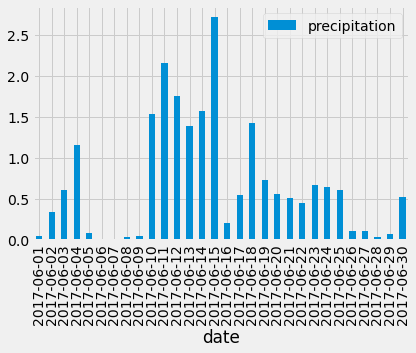

In [28]:
june_precip.plot(kind='bar')

In [29]:
june_precip.describe()

,precipitation
count,30.000000
mean,0.684000
std,0.711441
min,0.000000
25%,0.085000
50%,0.530000
75%,1.045000
max,2.710000


In [35]:
dec_precip.describe()

,precipitation
count,30.000000
mean,1.112333
std,1.024509
min,0.030000
25%,0.282500
50%,0.785000
75%,1.830000
max,3.350000
